In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
# reading train files, X
import glob
files = glob.glob('dataset/strain/*.csv')

In [3]:
X = []
for file in files:
    df = pd.read_csv(file)
    X.append(df)
np.shape(X)

#expected output: (100, 360, 301)

(100, 360, 301)

In [4]:
dataX = np.reshape(X, (100, 360, 301, 1))  # (number of dataset, img_height, img_width, img_channel)
np.shape(dataX)

#expected output: (100, 360, 301, 1)

(100, 360, 301, 1)

In [5]:
# reading train files, Y
import glob
files = glob.glob('dataset/stress/*.csv')

In [6]:
Y = []
for file in files:
    df = pd.read_csv(file)
    Y.append(df)
np.shape(Y)

#expected output: (100, 360, 301, 1)

(100, 360, 301)

In [7]:
dataY = np.reshape(Y, (100, 360, 301, 1))  # (number of dataset, img_height, img_width, img_channel)
np.shape(dataY)

#expected output: (100, 360, 301, 1)

(100, 360, 301, 1)

In [8]:
# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(dataX, dataY, test_size=0.2)
np.shape(X_train)

#expected output: (80, 360, 301, 1)

(80, 360, 301, 1)

In [9]:
# DL model
model =  keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(128, (4, 4), padding='same', activation="relu",input_shape=(360, 301, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(128, (4, 4), padding='same', activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(256, (4, 4), padding='same', activation="relu"))
model.add(tf.keras.layers.Conv2D(128, (4, 4), padding='same', activation="relu"))
model.add(tf.keras.layers.Conv2D(128, (4, 4), padding='same', activation="relu"))
model.add(tf.keras.layers.Conv2D(1, (4, 4), padding="same", activation="relu"))

optimizer = keras.optimizers.Adam(lr=1e-3)
model.compile(optimizer=optimizer, loss='mae')

C:\Users\bir\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 360, 301, 128)     2176      
                                                                 
 batch_normalization (BatchN  (None, 360, 301, 128)    512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 360, 301, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 360, 301, 128)     262272    
                                                                 
 batch_normalization_1 (Batc  (None, 360, 301, 128)    512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 360, 301, 128)     0

In [11]:
history = model.fit(X_train, Y_train, epochs=5, steps_per_epoch=len(X_train)/3, 
                    batch_size=3, validation_data=(X_val, Y_val),
                    validation_steps=len(X_val)/3, verbose=1)

Epoch 1/5
26/26 [==============================] - 536s 20s/step - loss: 43.2543 - val_loss: 118.5251
Epoch 2/5
26/26 [==============================] - 526s 20s/step - loss: 21.5461 - val_loss: 117.0459
Epoch 3/5
26/26 [==============================] - 513s 19s/step - loss: 19.5496 - val_loss: 116.2614
Epoch 4/5
26/26 [==============================] - 513s 19s/step - loss: 20.4052 - val_loss: 112.8710
Epoch 5/5
26/26 [==============================] - 509s 19s/step - loss: 19.1749 - val_loss: 109.4365


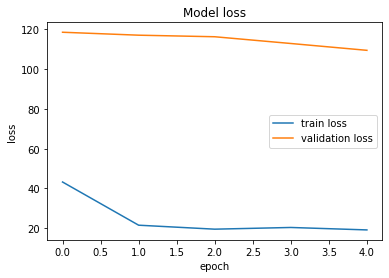

In [12]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [49]:
df_test = pd.read_csv('dataset/strain_test/101.csv')
test = np.reshape(np.array(df_test), (1, 360, 301, 1))
np.shape(test)

(1, 360, 301, 1)

In [50]:
pred_1 = model.predict(test)
np.shape(pred_1)

1/1 [==============================] - 1s 713ms/step


(1, 360, 301, 1)

In [51]:
o = np.reshape(test, (360, 301))
v = np.reshape(pred_1, (360, 301))

<IPython.core.display.Javascript object>


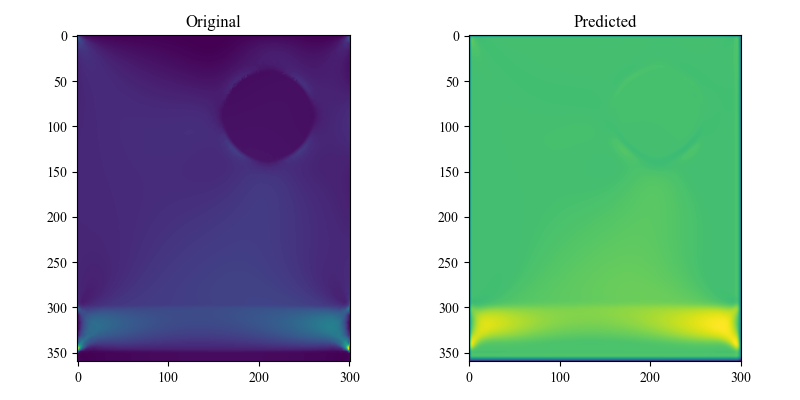

In [52]:
%matplotlib notebook
fig, axs = plt.subplots(1,2)
fig.set_size_inches(8, 4, forward=True)

axs[0].imshow(o)
axs[0].set_title('Original')

axs[1].imshow(v)
axs[1].set_title('Predicted')

plt.grid(False)
plt.tight_layout()
plt.rcParams["font.family"] = "Times New Roman"
plt.show()
#plt.savefig('res.jpg', bbox_inches='tight', dpi=1200)

In [53]:
def evaluation_metrics(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metrics:-')
    print(f'MSE: {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE: {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')

In [54]:
original = np.reshape(o, (1, 108360))
test = np.reshape(v, (1, 108360))

In [55]:
evaluation_metrics(original, test)

Evaluation metrics:-
MSE: 100.26059688439766
MAE: 9.968375757870072
RMSE: 10.013021366420709


In [56]:
#Young's modulus part
y = pd.read_csv('dataset/youngs modulus/101.csv')
youngs_modulus_original = np.reshape(np.array(y), (360, 301))

In [57]:
strain = o
stress = v
youngs_modulus_predicted = stress/strain

<IPython.core.display.Javascript object>


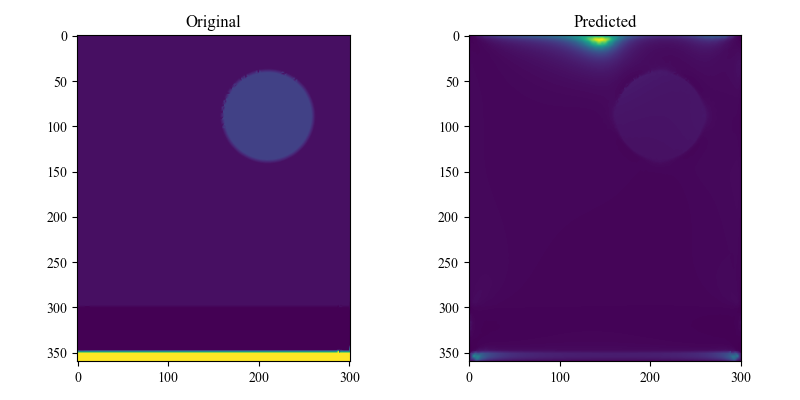

In [58]:
%matplotlib notebook
fig, axs = plt.subplots(1,2)
fig.set_size_inches(8, 4, forward=True)

axs[0].imshow(youngs_modulus_original)
axs[0].set_title('Original')

axs[1].imshow(youngs_modulus_predicted)
axs[1].set_title('Predicted')

plt.grid(False)
plt.tight_layout()
plt.rcParams["font.family"] = "Times New Roman"
plt.show()
#plt.savefig('res.jpg', bbox_inches='tight', dpi=1200)

In [62]:
evaluation_metrics(youngs_modulus_original, youngs_modulus_predicted)

Evaluation metrics:-
MSE: 1190077121.9475455
MAE: 14941.111376744982
RMSE: 34497.49442999514
